# installing packages

In [25]:
!pip install wordcloud

In [2]:
!python -m venv .env           # will create directory .env
!source .env/bin/activate      # activate virtualenv
!pip install -U spacy

'source' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string,re,random
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report,confusion_matrix
import spacy
from wordcloud import WordCloud

from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer


In [6]:
df=pd.read_csv(r"C:\Users\Hp\fake_job_postings.csv")

In [7]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [8]:
df.shape

(17880, 18)

In [9]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [10]:
columns={'job_id','telecommuting','has_company_logo','has_questions','salary_range','employment_type'}
for coln in columns:
    del df[coln]

drop irrelevant columns

In [11]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraudulent', ylabel='count'>

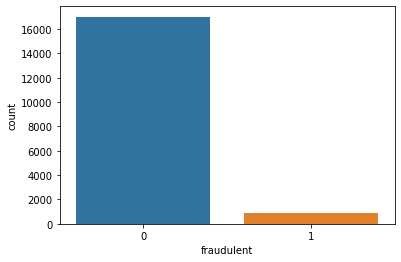

In [12]:
df.fillna('',inplace=True)
sns.countplot(df['fraudulent'])

no. of fraudulent jobs posted are less

In [13]:
df.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [14]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [15]:
exp=dict(df.required_experience.value_counts())

In [16]:
del exp['']

In [17]:
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

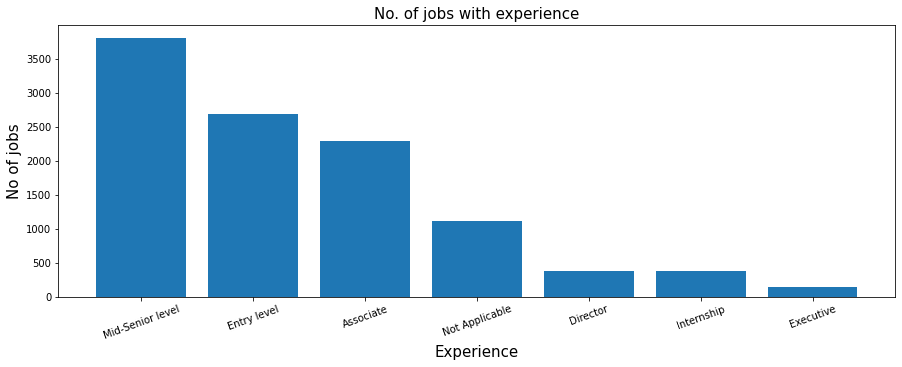

In [18]:
plt.figure(figsize=(15,5))
plt.bar(exp.keys(),exp.values())
plt.xlabel('Experience',size=15)
plt.ylabel('No of jobs',size=15)
plt.title('No. of jobs with experience',size=15)
plt.xticks(rotation=20)
plt.show()

maximum number of jobs posted required mid senior level

In [23]:
def split(location):
    l= location.split(',')
    return l[0]

In [24]:
df['country'] = df.location.apply(split)

In [25]:
df['country']

0        US
1        NZ
2        US
3        US
4        US
         ..
17875    CA
17876    US
17877    US
17878    NG
17879    NZ
Name: country, Length: 17880, dtype: object

In [26]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [27]:
coun= exp=dict(df.country.value_counts()[:14])
del coun['']
coun

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117,
 'IE': 114,
 'SG': 80}

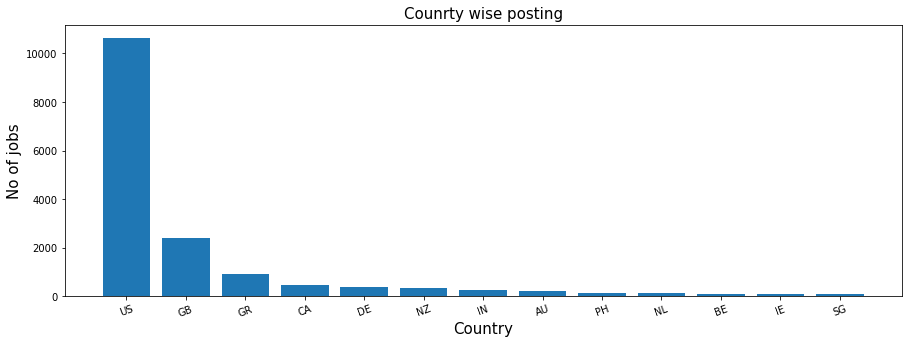

In [105]:
plt.figure(figsize=(15,5))
plt.bar(coun.keys(),coun.values())
plt.xlabel('Country',size=15)
plt.ylabel('No of jobs',size=15)
plt.title('Counrty wise posting',size=15)
plt.xticks(rotation=20)
plt.show()

US had highest job postings

In [29]:
edu=dict(df.required_education.value_counts()[:6])
del edu['']
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274}

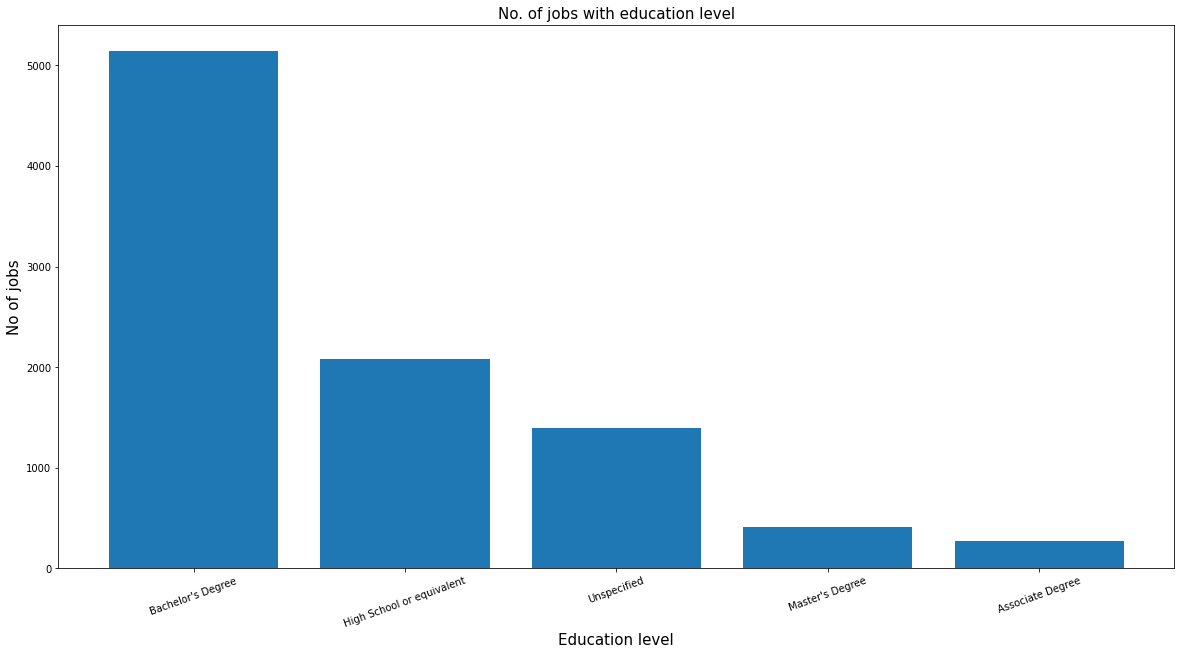

In [30]:
plt.figure(figsize=(20,10))
plt.bar(edu.keys(),edu.values())
plt.xlabel('Education level',size=15)
plt.ylabel('No of jobs',size=15)
plt.title('No. of jobs with education level',size=15)
plt.xticks(rotation=20)
plt.show()

most job require a degree level of Bachelor

# top 10 titles posted which were non fraudulent

In [31]:
print(df[df.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


# combine all text

In [32]:
df['text']=df['title']+df['company_profile']+df['description']+df['requirements']+df['benefits']
del df['title']
del df['company_profile']
del df['location']
del df['department']
del df['description']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['function']
del df['country']
del df['industry']


In [33]:
del df['requirements']
df.head()

,fraudulent,text
0,0,"Marketing InternWe're Food52, and we've create..."
1,0,Customer Service - Cloud Video Production90 Se...
2,0,Commissioning Machinery Assistant (CMA)Valor S...
3,0,Account Executive - Washington DCOur passion f...
4,0,Bill Review ManagerSpotSource Solutions LLC is...


In [34]:
realjobs_text=df[df.fraudulent==0].text
fraudjobs_text= df[df.fraudulent==1].text

In [35]:
realjobs_text

0        Marketing InternWe're Food52, and we've create...
1        Customer Service - Cloud Video Production90 Se...
2        Commissioning Machinery Assistant (CMA)Valor S...
3        Account Executive - Washington DCOur passion f...
4        Bill Review ManagerSpotSource Solutions LLC is...
                               ...                        
17875    Account Director - Distribution Vend is lookin...
17876    Payroll AccountantWebLinc is the e-commerce pl...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic DesignerNemsia Studios is looking for ...
17879    Web Application DevelopersVend is looking for ...
Name: text, Length: 17014, dtype: object

# create word cloud of words used in fraudulent and real jobs

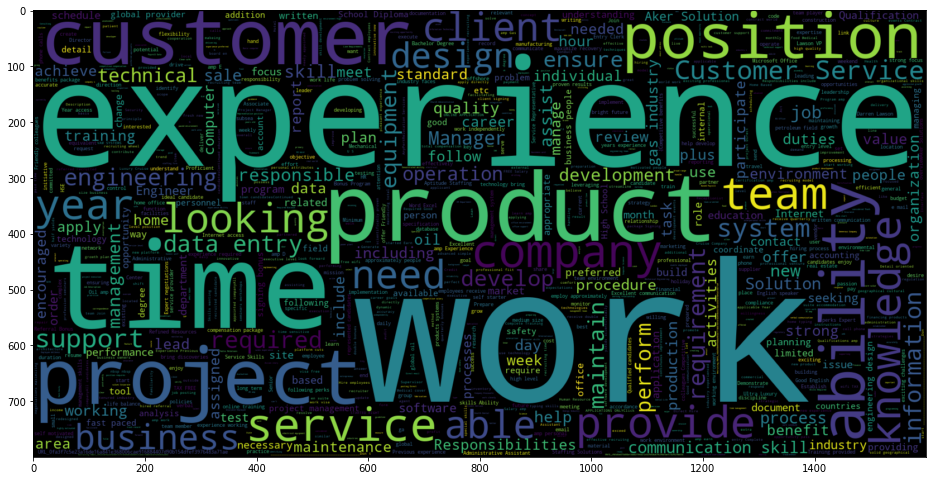

In [36]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
wc= WordCloud(min_font_size=3,max_words=1000,width=1600,height=800,stopwords=STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation='bilinear')

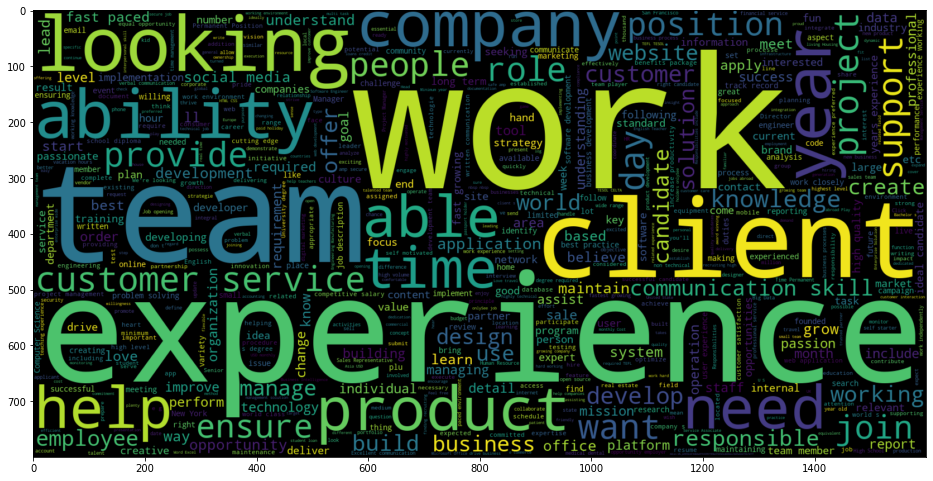

In [37]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
wc= WordCloud(min_font_size=3,max_words=1000,width=1600,height=800,stopwords=STOPWORDS).generate(str(" ".join(realjobs_text)))
plt.imshow(wc,interpolation='bilinear')

In [101]:
!pip install spacy && python -m spacy download en


2021-08-17 00:34:32.333440: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found


[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.


2021-08-17 00:34:32.334341: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
You should consider upgrading via the 'C:\Python\Python38\python.exe -m pip install --upgrade pip' command.


# tokenize, clean and remove stop words from text

In [47]:
#create a list of punctuation then stop words
punc= string.punctuation
nlp=spacy.load("en_core_web_sm")
#this is already a trained model
stop_words= spacy.lang.en.stop_words.STOP_WORDS
parser= English()

#create tokenizer function

def spacy_tokenizer(sentence): 
    mytokens =parser(sentence)
    #convert token to lower case
    mytokens=[word.lemma_.lower().strip() if word.lemma_ != '-PRON-' else word.lower_ for word in mytokens]
    #remove stop words
    mytokens=[ word for word in mytokens if word not in stop_Words and word not in punctuation]
    return mytokens

#custom transform using spacy
#cleaning text
class predictor(TransformerMixin):
    def transform(self,X,**transform_params):
        return(clean_text(text) for text in X)
    
    def fit(self,X,y=None,**fit_params):
        return self
    
    def get_params(self,deep=True):
        return ()
    #remove spaces and convert lower case
def clean_text(text):
    return text.strip().lower()



NameError: name 'TransformerMixin' is not defined

In [44]:
df['text'] =  df['text'].apply(clean_text)

In [45]:
cv = TfidfVectorizer(max_features = 100)
x = cv.fit_transform(df['text'])
df1=pd.DataFrame(x.toarray(),columns=cv.get_feature_names())
df.drop(['text'],axis=1,inplace=True)
main_df=pd.concat([df1,df],axis=1)

In [46]:
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041625,0.000000,0.042595,0.036633,0.000000,0.758231,0.000000,0.079104,0.000000,...,0.000000,0.000000,0.186826,0.051273,0.068373,0.000000,0.000000,0.000000,0.000000,0
1,0.021854,0.094723,0.035322,0.024233,0.041682,0.029729,0.489657,0.056506,0.060004,0.052543,...,0.000000,0.077849,0.165335,0.043755,0.116693,0.099110,0.000000,0.204484,0.130182,0
2,0.000000,0.000000,0.176827,0.000000,0.041732,0.089294,0.396872,0.113150,0.000000,0.000000,...,0.000000,0.062355,0.307425,0.058410,0.000000,0.000000,0.000000,0.094492,0.074480,0
3,0.023340,0.000000,0.018862,0.000000,0.000000,0.095250,0.697269,0.000000,0.032042,0.037410,...,0.023224,0.049885,0.075676,0.046730,0.000000,0.105849,0.019858,0.050397,0.059586,0
4,0.000000,0.000000,0.068085,0.000000,0.040171,0.028652,0.606750,0.081688,0.115660,0.000000,...,0.000000,0.000000,0.159345,0.028113,0.037489,0.000000,0.035840,0.030319,0.107542,0


In [48]:
df.head()

,fraudulent
0,0
1,0
2,0
3,0
4,0


In [49]:
df1

,ability,about,all,also,amp,an,and,are,as,at,...,well,who,will,with,work,working,world,years,you,your
0,0.000000,0.041625,0.000000,0.042595,0.036633,0.000000,0.758231,0.000000,0.079104,0.000000,...,0.040387,0.000000,0.000000,0.186826,0.051273,0.068373,0.000000,0.000000,0.000000,0.000000
1,0.021854,0.094723,0.035322,0.024233,0.041682,0.029729,0.489657,0.056506,0.060004,0.052543,...,0.000000,0.000000,0.077849,0.165335,0.043755,0.116693,0.099110,0.000000,0.204484,0.130182
2,0.000000,0.000000,0.176827,0.000000,0.041732,0.089294,0.396872,0.113150,0.000000,0.000000,...,0.000000,0.000000,0.062355,0.307425,0.058410,0.000000,0.000000,0.000000,0.094492,0.074480
3,0.023340,0.000000,0.018862,0.000000,0.000000,0.095250,0.697269,0.000000,0.032042,0.037410,...,0.000000,0.023224,0.049885,0.075676,0.046730,0.000000,0.105849,0.019858,0.050397,0.059586
4,0.000000,0.000000,0.068085,0.000000,0.040171,0.028652,0.606750,0.081688,0.115660,0.000000,...,0.044288,0.000000,0.000000,0.159345,0.028113,0.037489,0.000000,0.035840,0.030319,0.107542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0.019540,0.021173,0.078956,0.043334,0.074536,0.039871,0.416962,0.037892,0.013413,0.093959,...,0.000000,0.058329,0.027842,0.168947,0.156487,0.121727,0.044308,0.000000,0.323473,0.099770
17876,0.058340,0.063216,0.094293,0.032345,0.083452,0.019840,0.591328,0.037711,0.000000,0.070132,...,0.061336,0.000000,0.041564,0.204919,0.116803,0.000000,0.000000,0.049636,0.062985,0.049646
17877,0.043157,0.046764,0.000000,0.000000,0.000000,0.029353,0.529524,0.111586,0.059247,0.034587,...,0.000000,0.000000,0.061493,0.093285,0.057603,0.038407,0.000000,0.073437,0.124248,0.073451
17878,0.000000,0.000000,0.061143,0.000000,0.144302,0.051460,0.443981,0.048906,0.000000,0.060635,...,0.000000,0.075283,0.269513,0.081770,0.050493,0.067332,0.000000,0.000000,0.163368,0.128769


In [50]:
Y= main_df.iloc[:,-1]
X=main_df.iloc[:,:-1]
#all columns in x only fraudulent col in y


# split data into training and tesing to apply prediction model

In [51]:
x_train,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)
#70% training 30%testing
print(x_train.shape)
print(ytrain.shape)

(12516, 100)
(12516,)


# random forest

In [52]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion='entropy')
model=rfc.fit(x_train,ytrain)

In [79]:
xtest

,ability,about,all,also,amp,an,and,are,as,at,...,well,who,will,with,work,working,world,years,you,your
4028,0.073473,0.079614,0.000000,0.000000,0.000000,0.049973,0.627125,0.047493,0.100865,0.000000,...,0.077246,0.073107,0.104689,0.039703,0.000000,0.000000,0.083301,0.000000,0.000000,0.000000
11328,0.032057,0.000000,0.025906,0.035546,0.000000,0.000000,0.495938,0.041443,0.110021,0.051382,...,0.033703,0.000000,0.091354,0.155907,0.042788,0.000000,0.000000,0.027274,0.161511,0.027280
2457,0.000000,0.000000,0.000000,0.000000,0.406624,0.000000,0.227468,0.000000,0.125436,0.000000,...,0.064042,0.000000,0.000000,0.065834,0.040652,0.054210,0.069062,0.000000,0.000000,0.000000
17691,0.000000,0.000000,0.000000,0.092568,0.079610,0.000000,0.222673,0.107925,0.114605,0.000000,...,0.087768,0.000000,0.356852,0.180448,0.055713,0.074293,0.000000,0.000000,0.360514,0.213123
3741,0.000000,0.067654,0.025228,0.000000,0.029770,0.042466,0.516264,0.121075,0.085713,0.075055,...,0.000000,0.124249,0.022241,0.118087,0.104169,0.055564,0.035394,0.026560,0.224690,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,0.000000,0.000000,0.000000,0.044698,0.000000,0.082253,0.408586,0.052114,0.083010,0.064612,...,0.127143,0.000000,0.143595,0.152483,0.134511,0.035874,0.045703,0.034297,0.058027,0.068607
5776,0.000000,0.000000,0.060855,0.000000,0.000000,0.102436,0.482060,0.000000,0.155067,0.060349,...,0.000000,0.074928,0.053649,0.122077,0.050255,0.067015,0.000000,0.000000,0.216797,0.064081
642,0.000000,0.098583,0.036762,0.050441,0.000000,0.123760,0.436809,0.088213,0.156123,0.036456,...,0.143476,0.045263,0.000000,0.049164,0.212509,0.202415,0.051575,0.000000,0.130964,0.154842
190,0.035778,0.000000,0.000000,0.000000,0.000000,0.024335,0.648944,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.058002,0.023877,0.000000,0.000000,0.000000,0.000000,0.000000


In [94]:
pred=rfc.predict(xtest)
score= accuracy_score(ytest,pred)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# accuracy score

In [55]:
print(score)

0.9675615212527964


In [56]:
print(confusion_matrix(ytest,pred))

[[5086    0]
 [ 174  104]]


In [57]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5086
           1       1.00      0.37      0.54       278

    accuracy                           0.97      5364
   macro avg       0.98      0.69      0.76      5364
weighted avg       0.97      0.97      0.96      5364



# Apply support vector machine

In [58]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [62]:
clf= svm.SVC()
clf.fit(x_train,ytrain)
predy= clf.predict(xtest)

In [63]:
classification_report(ytest,predy)

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98      5086\n           1       0.98      0.33      0.49       278\n\n    accuracy                           0.96      5364\n   macro avg       0.97      0.66      0.74      5364\nweighted avg       0.97      0.96      0.96      5364\n'

# accuracy score

In [64]:
print(accuracy_score(ytest,predy))

0.964765100671141


not much difference from random forrest

In [88]:
print(confusion_matrix(ytest,predy))

[[5084    2]
 [ 187   91]]


In [92]:
xtest

,ability,about,all,also,amp,an,and,are,as,at,...,well,who,will,with,work,working,world,years,you,your
4028,0.073473,0.079614,0.000000,0.000000,0.000000,0.049973,0.627125,0.047493,0.100865,0.000000,...,0.077246,0.073107,0.104689,0.039703,0.000000,0.000000,0.083301,0.000000,0.000000,0.000000
11328,0.032057,0.000000,0.025906,0.035546,0.000000,0.000000,0.495938,0.041443,0.110021,0.051382,...,0.033703,0.000000,0.091354,0.155907,0.042788,0.000000,0.000000,0.027274,0.161511,0.027280
2457,0.000000,0.000000,0.000000,0.000000,0.406624,0.000000,0.227468,0.000000,0.125436,0.000000,...,0.064042,0.000000,0.000000,0.065834,0.040652,0.054210,0.069062,0.000000,0.000000,0.000000
17691,0.000000,0.000000,0.000000,0.092568,0.079610,0.000000,0.222673,0.107925,0.114605,0.000000,...,0.087768,0.000000,0.356852,0.180448,0.055713,0.074293,0.000000,0.000000,0.360514,0.213123
3741,0.000000,0.067654,0.025228,0.000000,0.029770,0.042466,0.516264,0.121075,0.085713,0.075055,...,0.000000,0.124249,0.022241,0.118087,0.104169,0.055564,0.035394,0.026560,0.224690,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,0.000000,0.000000,0.000000,0.044698,0.000000,0.082253,0.408586,0.052114,0.083010,0.064612,...,0.127143,0.000000,0.143595,0.152483,0.134511,0.035874,0.045703,0.034297,0.058027,0.068607
5776,0.000000,0.000000,0.060855,0.000000,0.000000,0.102436,0.482060,0.000000,0.155067,0.060349,...,0.000000,0.074928,0.053649,0.122077,0.050255,0.067015,0.000000,0.000000,0.216797,0.064081
642,0.000000,0.098583,0.036762,0.050441,0.000000,0.123760,0.436809,0.088213,0.156123,0.036456,...,0.143476,0.045263,0.000000,0.049164,0.212509,0.202415,0.051575,0.000000,0.130964,0.154842
190,0.035778,0.000000,0.000000,0.000000,0.000000,0.024335,0.648944,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.058002,0.023877,0.000000,0.000000,0.000000,0.000000,0.000000


In [104]:
predy

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

predictied array